In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

#get the data from https://www.kaggle.com/karrrimba/movie-metadatacsv 
df=pd.read_csv('movies_metadata.csv')
df.head()

C:\Python\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# Data Cleaning

 - For cleaning the data, I started with dropping the duplicate rows. (13 duplicates)
- Just kept the rows wih False and True in adult column.
- I also dropped the columns ['status','adult','belongs_to_collection','homepage','imdb_id',
          'original_title','overview','poster_path','tagline','video','spoken_languages'], since they were not important for this project. 
          
- The ‘budget’ and ‘popularity’ columns have been changed to numeric.

- The ‘release_date’ has been changed to datetime format.

- ‘year’ column is added for future use.

- I used the literal_eval, apply and lambda to  change the format of [‘production_companies’, ‘genres’, and ‘production_countries’] columns.

In [2]:
df.drop_duplicates(inplace=True)

df=df[(df.adult=='False')|(df.adult=='True')]

df.drop(['status','adult','belongs_to_collection','homepage','imdb_id',
          'original_title','overview','poster_path','tagline','video','spoken_languages'],axis=1,inplace=True)#drop unnecessary columns

df['budget']=pd.to_numeric(df['budget'])
df['popularity']=pd.to_numeric(df['popularity'])
df=df[df.popularity.notnull()]

df['release_date']=pd.to_datetime(df['release_date'])
df['year']=df['release_date'].dt.year

df['production_companies']=df.production_companies.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x, list) else [])
df['genres']=df.genres.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x, list) else [])
df['production_countries']=df.production_countries.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x, list) else [])

df.head()

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,year
0,30000000,"[Animation, Comedy, Family]",862,en,21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,1995.0
1,65000000,"[Adventure, Fantasy, Family]",8844,en,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,1995.0
2,0,"[Romance, Comedy]",15602,en,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,1995.0
3,16000000,"[Comedy, Drama, Romance]",31357,en,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,1995.0
4,0,[Comedy],11862,en,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,1995.0


Use describe func to get min, max, mean of some of the columns

In [3]:
df.popularity.describe()

count    45447.000000
mean         2.921534
std          6.006039
min          0.000000
25%          0.385945
50%          1.127513
75%          3.679022
max        547.488298
Name: popularity, dtype: float64

In [4]:
df.vote_average.describe()

count    45447.000000
mean         5.618199
std          1.924198
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

In [5]:
df.revenue.describe()

count    4.544700e+04
mean     1.121254e+07
std      6.434117e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

In [6]:
df[df.revenue==0].shape #38041 do not have the info about revenue

(38041, 14)

In [7]:
df.runtime.describe()
df[df.runtime==0].shape #15581 moview do not have their runtime

(1558, 14)

In [8]:
print(sum(df['title'].duplicated(keep=False)))
print(df['title'].nunique()) #5519 ducplicated title, 42277 unique titles

5493
42277


Drop 17 movies with the same info except for popularity

In [9]:
df=df.drop(df[df[['title','year','release_date']].duplicated(keep='first')].sort_values(by='title').index,axis=0)
df.shape 

(45430, 14)

Number of movies of each genre

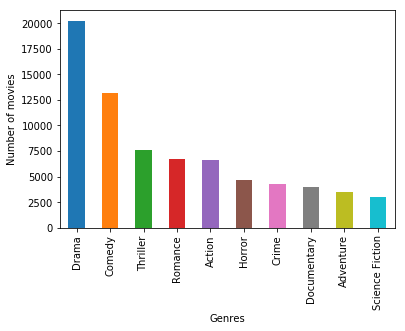

In [10]:
Genres=df.genres
Genres=Genres.apply(pd.Series).stack(level=-1,dropna=True)
Genres.value_counts().head(10).plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Number of movies')
plt.show()

In [11]:
mask = df.production_countries.apply(lambda x: 'United States of America' in x)
sum(mask) #USA produced 21140 movies

21140

Some movies have more than one production country. I used stack to get the right count value profuction of each country

In [12]:
Countries=df.production_countries
Countries=Countries.apply(pd.Series).stack(level=-1,dropna=True)

In [13]:
Countries.value_counts().head(10)


United States of America    21140
United Kingdom               4091
France                       3932
Germany                      2249
Italy                        2166
Canada                       1765
Japan                        1645
Spain                         964
Russia                        912
India                         827
dtype: int64

To get a better bar plot, I ignored USA from the list, since USA has produced 5 times more than Uninted Kingdom

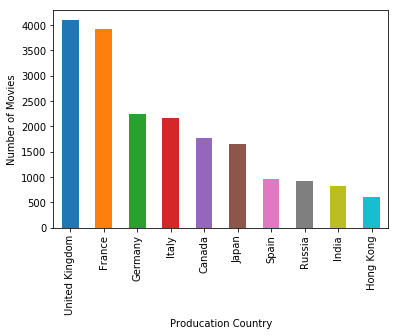

In [14]:
Countries.value_counts()[1:11].plot(kind='bar') #Ignore USA
plt.xlabel('Producation Country')
plt.ylabel('Number of Movies')
plt.show()

Since some movies have more than one producation company, I used stack to get the right value counts of each company.

In [15]:
Companies=df['production_companies']
Companies=Companies.apply(pd.Series).stack(level=-1,dropna=True)

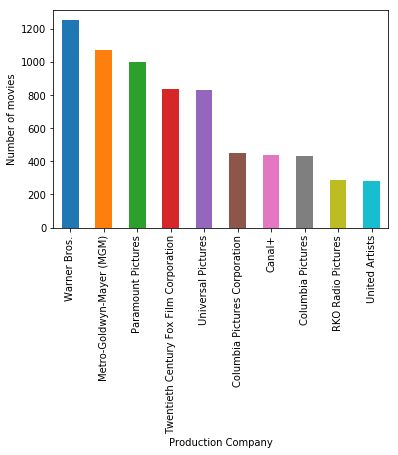

In [16]:
Companies.value_counts().head(10).plot(kind='bar')
plt.xlabel('Production Company')
plt.ylabel('Number of movies')
plt.show()

Just check how many movies have higher budget than revenus

In [17]:
print(sum((df['revenue']-df['budget'])>0))  #5781 movies have higher revenue than budget
print(sum((df['revenue']-df['budget'])<0)) #5113 movies have lower revenue than budget
print(sum((df['revenue']-df['budget'])==0)) #34553 moview have equal revenue and budget

5775
5108
34547


Avator is the movie with the max revenue in the history. Star wars: The force awakens is in the second place and Titanic is in the third position.

In [18]:
df[df.revenue==df.revenue.max()]['title'] #max revenue is for Avator

14551    Avatar
Name: title, dtype: object

In [19]:
df.sort_values(by='revenue',ascending=False).head(10)['title']

14551                                          Avatar
26555                    Star Wars: The Force Awakens
1639                                          Titanic
17818                                    The Avengers
25084                                  Jurassic World
28830                                       Furious 7
26558                         Avengers: Age of Ultron
17437    Harry Potter and the Deathly Hallows: Part 2
22110                                          Frozen
42222                            Beauty and the Beast
Name: title, dtype: object

Some movies with vote_averge of 10 is presented bellow. 190 movies has the vote_average of 10.

In [20]:
df.sort_values(by='vote_average',ascending=False).head(10)[['title','vote_average']]

,title,vote_average
41646,Big Jay Oakerson: Live at Webster Hall,10.0
33389,The Italian Key,10.0
11385,Joe Cocker - Mad Dogs & Englishmen,10.0
41879,Panorama of Esplanade by Night,10.0
22395,Marvin Hamlisch: What He Did For Love,10.0
22396,Meat the Truth,10.0
11050,Blessed Event,10.0
33627,Mad As Hell,10.0
22578,Eggshells,10.0
42136,The Black Sheep of Whitehall,10.0


In [21]:
sum(df.vote_average==10) #190 moview with avg rating of 10

190

The movies with highest revenue do not have the highest popularity and vote_average. Though the total number of votes for each movie is important.

In [22]:
df.sort_values(by='revenue',ascending=False).head(10)[['title','popularity','vote_average','revenue']]#10 highest revenue

,title,popularity,vote_average,revenue
14551,Avatar,185.070892,7.2,2.787965e+09
26555,Star Wars: The Force Awakens,31.626013,7.5,2.068224e+09
1639,Titanic,26.889070,7.5,1.845034e+09
17818,The Avengers,89.887648,7.4,1.519558e+09
25084,Jurassic World,32.790475,6.5,1.513529e+09
28830,Furious 7,27.275687,7.3,1.506249e+09
26558,Avengers: Age of Ultron,37.379420,7.3,1.405404e+09
17437,Harry Potter and the Deathly Hallows: Part 2,24.990737,7.9,1.342000e+09
22110,Frozen,24.248243,7.3,1.274219e+09
42222,Beauty and the Beast,287.253654,6.8,1.262886e+09


The first three most popular movies are Minions, Wonder Woman, and Beauty and the beast.

In [23]:
df.sort_values(by='popularity',ascending=False).head(10)[['title','popularity','vote_average','revenue']] #10 most popular

,title,popularity,vote_average,revenue
30700,Minions,547.488298,6.4,1.156731e+09
33356,Wonder Woman,294.337037,7.2,8.205804e+08
42222,Beauty and the Beast,287.253654,6.8,1.262886e+09
43644,Baby Driver,228.032744,7.2,2.245113e+08
24455,Big Hero 6,213.849907,7.8,6.521054e+08
26564,Deadpool,187.860492,7.4,7.831130e+08
26566,Guardians of the Galaxy Vol. 2,185.330992,7.6,8.634161e+08
14551,Avatar,185.070892,7.2,2.787965e+09
24351,John Wick,183.870374,7.0,8.876166e+07
23675,Gone Girl,154.801009,7.9,3.693304e+08


Plotting the total number of movies produced each year.

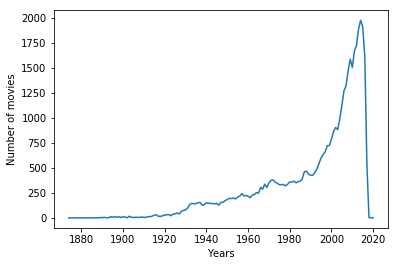

In [24]:
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date'].dt.year.value_counts().sort_index().plot()
plt.xlabel('Years')
plt.ylabel('Number of movies')
plt.show()


Total number of movies produced each month

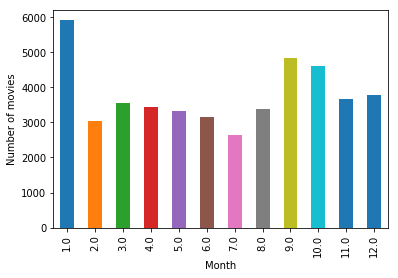

In [25]:
df['release_date'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of movies')
plt.show()

Most moview released on first day of each month

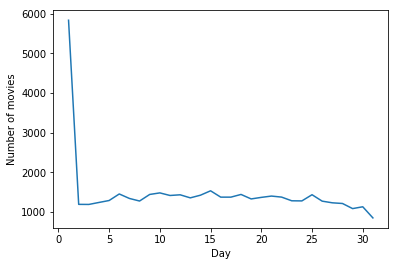

In [26]:
df['release_date'].dt.day.value_counts().sort_index().plot()
plt.xlabel('Day')
plt.ylabel('Number of movies')
plt.show() #most movies release on first day of each month

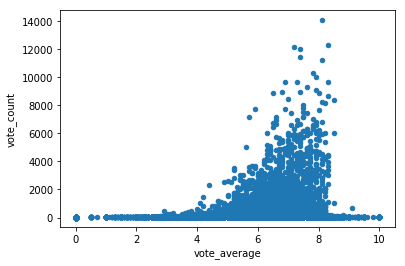

In [27]:
df.plot.scatter(y='vote_count',x='vote_average')
plt.show()

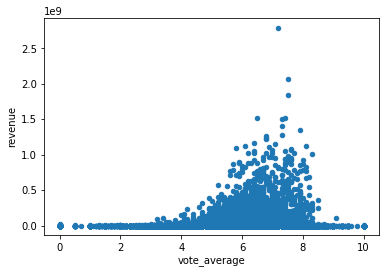

In [28]:
df.plot.scatter(y='revenue',x='vote_average')
plt.show()

45430 movies are in English.
French, Italian, and Japanese are the second, third and forth languages. 

45430


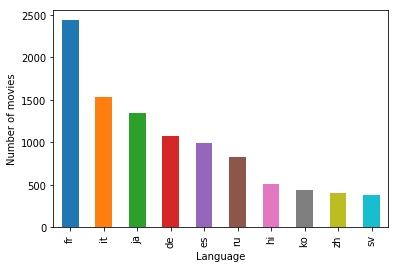

In [29]:
print(len(df['original_language']=='en'))#45430 movies in English
df[df['original_language']!='en']['original_language'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Language')
plt.ylabel('Number of movies')
plt.show() #except En

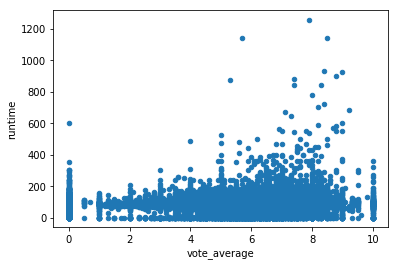

In [30]:
df.plot.scatter(y='runtime',x='vote_average')
plt.show()

- Budget and revenue are 77% correlated.
- Budget and vote_count are around 67% correlated.
- popularity and revenue are 50% correlated.
- popularity and vote_count are 56% correlated.
- Revenue and vote_count are 81% correlated.

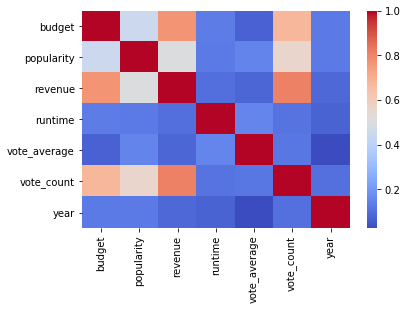

In [31]:
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show() #correlation 

In [32]:
df.corr()

,budget,popularity,revenue,runtime,vote_average,vote_count,year
budget,1.000000,0.449682,0.768825,0.134700,0.073496,0.676699,0.131647
popularity,0.449682,1.000000,0.506221,0.129912,0.154357,0.559995,0.131634
revenue,0.768825,0.506221,1.000000,0.103948,0.083883,0.812031,0.088358
runtime,0.134700,0.129912,0.103948,1.000000,0.158192,0.113555,0.078714
vote_average,0.073496,0.154357,0.083883,0.158192,1.000000,0.123611,0.025829
vote_count,0.676699,0.559995,0.812031,0.113555,0.123611,1.000000,0.106797
year,0.131647,0.131634,0.088358,0.078714,0.025829,0.106797,1.000000
